In [5]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import os
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
from tensorflow.random import set_seed
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
pd.options.display.max_colwidth = 100
seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(42)
warnings.filterwarnings('ignore')
IMG_SIZE = 150
SEED = 42

In [7]:
train_path = "/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output"
#train_path = os.path.join(main_path,"train")

train_black = glob.glob(train_path+"/black/*.png")
train_blue = glob.glob(train_path+"/blue/*.png")
train_brown = glob.glob(train_path+"/brown/*.png")
train_gray = glob.glob(train_path+"/gray/*.png")
train_green = glob.glob(train_path+"/green/*.png")
train_orange = glob.glob(train_path+"/orange/*.png")
train_purple = glob.glob(train_path+"/purple/*.png")
train_red = glob.glob(train_path+"/red/*.png")
train_white = glob.glob(train_path+"/white/*.png")
train_yellow = glob.glob(train_path+"/yellow/*.png")

In [8]:
train_black

['/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CIRCB.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CIRCG.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CIRCH.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CIRCI.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CIRCO.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CIRCR.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CIRCS.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CROSA.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CROSB.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CROSH.png',
 '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\\CROSL.png',
 '/Users/skylo/Docume

In [9]:
train_list = [x for x in train_black]

train_list.extend([x for x in train_blue])
train_list.extend([x for x in train_brown])
train_list.extend([x for x in train_gray])
train_list.extend([x for x in train_green])
train_list.extend([x for x in train_orange])
train_list.extend([x for x in train_purple])
train_list.extend([x for x in train_red])
train_list.extend([x for x in train_white])
train_list.extend([x for x in train_yellow])

df_train = pd.DataFrame(np.concatenate([
                       ['0']*len(train_black),
                       ['1']*len(train_blue),
                       ['2']*len(train_brown),
                       ['3']*len(train_gray),
                       ['4']*len(train_green),
                       ['5']*len(train_orange),
                       ['6']*len(train_purple),
                       ['7']*len(train_red),
                       ['8']*len(train_white),
                       ['9']*len(train_yellow)
                       ]), columns = ['label'])
df_train['image'] = [x for x in train_list]

In [10]:
df_train

,label,image
0,0,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\CIRCB.png
1,0,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\CIRCG.png
2,0,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\CIRCH.png
3,0,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\CIRCI.png
4,0,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/black\CIRCO.png
...,...,...
994,9,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/yellow\TRIAL.png
995,9,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/yellow\TRIAQ.png
996,9,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/yellow\TRIAU.png
997,9,/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output/yellow\TRIAW.png


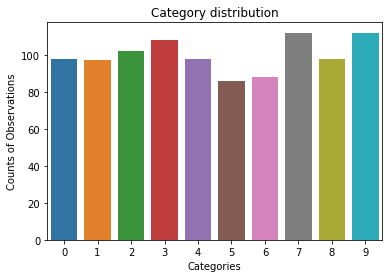

In [11]:
sns.countplot(df_train['label'])
plt.title('Category distribution')
plt.xlabel('Categories')
plt.ylabel('Counts of Observations');

In [12]:
path = '/Users/skylo/Documents/Cal Poly Pomona/Projects/Output_Model/output'

#List of image:
img_list = list(df_train['image'])
data_img = []

for each in img_list:

  #Each image path:
  each_path = os.path.join(path, each)
  #Read each image:
  each_img = cv2.imread(each_path)
  #OpenCv default color is BGR. Convert it to RGB:
  each_img = cv2.cvtColor(each_img, cv2.COLOR_BGR2RGB)
  #Resize the images:
  each_img_resized = cv2.resize(each_img, (128,128))
  #Save arrays to a list:
  data_img.append(each_img_resized)# Converting list to numpy array

X = np.array(data_img)

In [13]:
print('Shape of X: ', X.shape)


Shape of X:  (999, 128, 128, 3)


In [14]:
y = OneHotEncoder(dtype='int8', sparse=False).fit_transform(df_train['label'].values.reshape(-1,1))

In [15]:
print('Shape of y: ', y.shape)

Shape of y:  (999, 10)


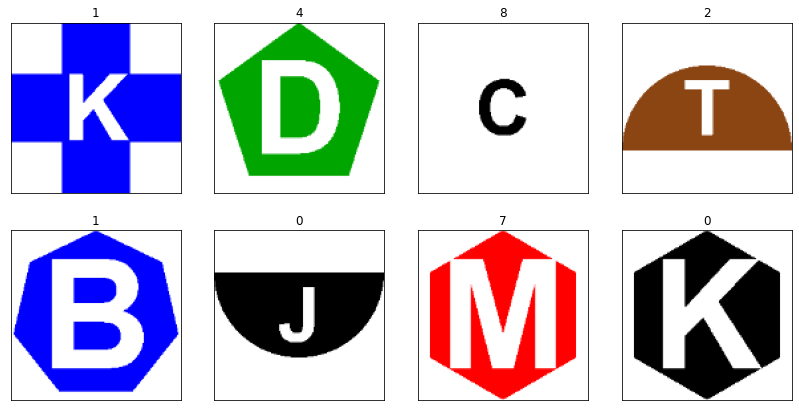

In [16]:
indices = np.random.randint(0,999,8)
i = 1
plt.figure(figsize=(14,7))
for each in indices:
    plt.subplot(2,4,i)
    plt.imshow(X[each])
    plt.title(df_train['label'].loc[each])
    plt.xticks([])
    plt.yticks([])
    i += 1

In [17]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape  : ', X_val.shape)
print('y_val shape  : ', y_val.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape:  (679, 128, 128, 3)
y_train shape:  (679, 10)
X_val shape  :  (170, 128, 128, 3)
y_val shape  :  (170, 10)
X_test shape :  (150, 128, 128, 3)
y_test shape :  (150, 10)


In [18]:
train_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)
validation_gen = ImageDataGenerator(horizontal_flip=True,
                                    rotation_range = 45,
                                    zoom_range=0.2,
                                    height_shift_range = 0.5,
                                    width_shift_range = 0.5)
train_gen.fit(X_train)
validation_gen.fit(X_val)

In [19]:
batch_size = 64
epochs = 10

In [20]:
base = Xception(include_top=False, 
                weights='imagenet', 
                input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)

In [21]:
head = Dense(10, activation='softmax')(x)
model = Model(inputs=base.input, outputs=head)

In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'], run_eagerly=True)

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 16, 16, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_2 (Conv2D)              (None, 8, 8, 728)    186368      ['add_1[0][0]']                  
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 8, 8, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 8, 8, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 8, 8, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 8, 8, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 8, 8, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 8, 8, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 8, 8, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 8, 8, 728)   0           ['add_10[0][0]']                 
 on)      

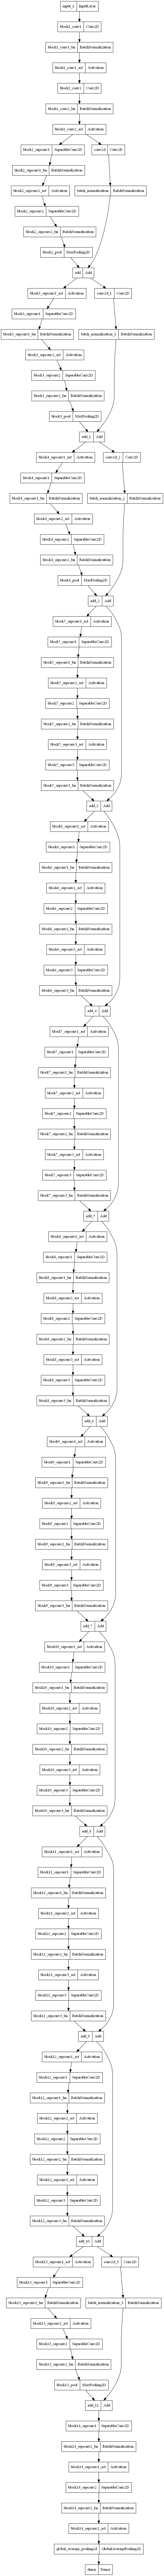

In [24]:
# tf.keras.utils.plot_model(
#             model,
#             to_file="model.png",
#             show_shapes=False,
#             show_dtype=False,
#             show_layer_names=True,
#             rankdir="TB",
#             expand_nested=False,
#             dpi=96,
#             layer_range=None,
# )

In [25]:
history = model.fit_generator(
               train_gen.flow(X_train, y_train,
               batch_size=batch_size),
               epochs = epochs,
               validation_data = validation_gen.flow(X_val, y_val)
)

Epoch 1/10
11/11 [==============================] - 113s 10s/step - loss: 2.1487 - accuracy: 0.2916 - val_loss: 2.6181 - val_accuracy: 0.1353
Epoch 2/10
11/11 [==============================] - 98s 9s/step - loss: 1.5930 - accuracy: 0.6510 - val_loss: 2.7633 - val_accuracy: 0.1706
Epoch 3/10
11/11 [==============================] - 119s 11s/step - loss: 0.9451 - accuracy: 0.8542 - val_loss: 2.8234 - val_accuracy: 0.1941
Epoch 4/10
11/11 [==============================] - 120s 11s/step - loss: 0.4703 - accuracy: 0.9278 - val_loss: 2.0898 - val_accuracy: 0.4118
Epoch 5/10
11/11 [==============================] - 124s 11s/step - loss: 0.2145 - accuracy: 0.9588 - val_loss: 1.6061 - val_accuracy: 0.6235
Epoch 6/10
11/11 [==============================] - 115s 11s/step - loss: 0.1075 - accuracy: 0.9838 - val_loss: 1.4124 - val_accuracy: 0.6471
Epoch 7/10
11/11 [==============================] - 115s 11s/step - loss: 0.0611 - accuracy: 0.9956 - val_loss: 1.0924 - val_accuracy: 0.7176
Epoch 8/

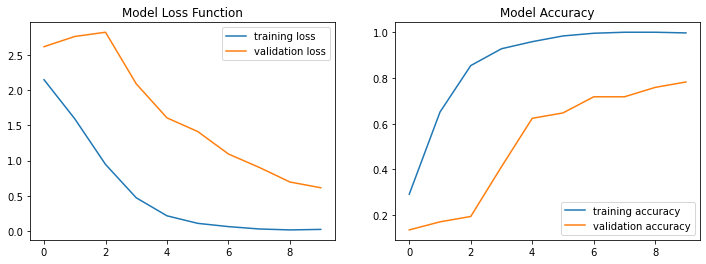

In [26]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='training loss')
plt.plot(history_df['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(history_df['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend();

5/5 [==============================] - 5s 900ms/step


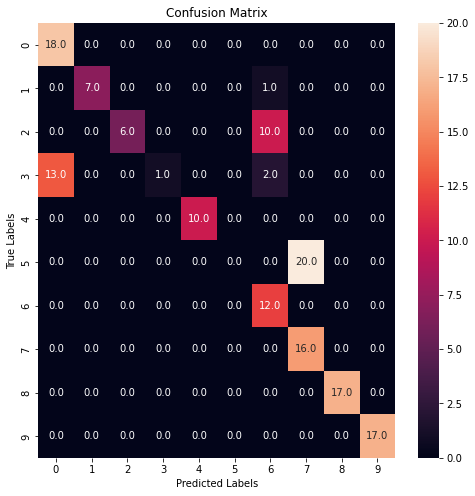

In [27]:
# Predicting labels from X_test data
y_pred = model.predict(X_test)# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes = np.argmax(y_pred, axis = 1)# Convert test labels from one hot encoding to list
y_test_classes = np.argmax(y_test, axis = 1)# Create the confusion matrix
confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

In [28]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        18
           1       1.00      0.88      0.93         8
           2       1.00      0.38      0.55        16
           3       1.00      0.06      0.12        16
           4       1.00      1.00      1.00        10
           5       0.00      0.00      0.00        20
           6       0.48      1.00      0.65        12
           7       0.44      1.00      0.62        16
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        17

    accuracy                           0.69       150
   macro avg       0.75      0.73      0.66       150
weighted avg       0.72      0.69      0.62       150



In [29]:
test_loss = model.evaluate(X_test, y_test)

5/5 [==============================] - 4s 876ms/step - loss: 0.7885 - accuracy: 0.6933


In [30]:
test_loss = model.evaluate(X_val, y_val)

6/6 [==============================] - 5s 820ms/step - loss: 0.5974 - accuracy: 0.7765
